# PCBの特性インピーダンス計算

Conductor 1 charge density range: 4.4759612052445217e-13 3.32071194504851e-12
Conductor 1 total charge: 2.942500096897602e-16


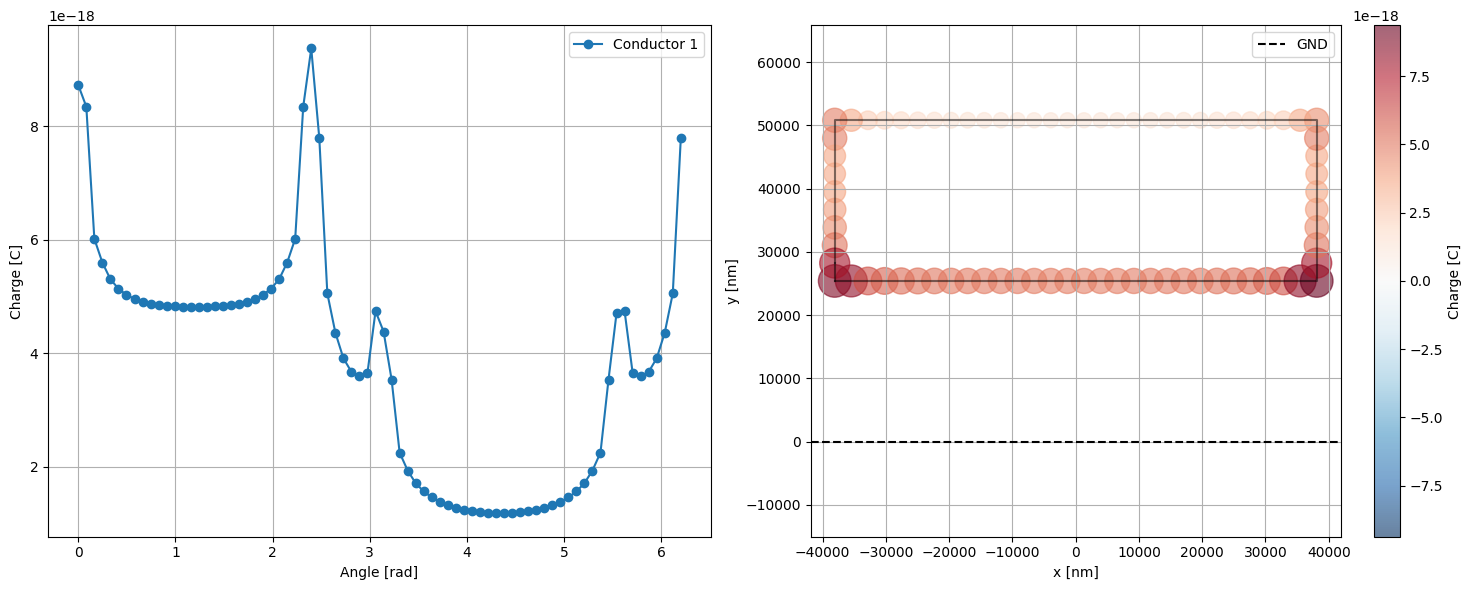

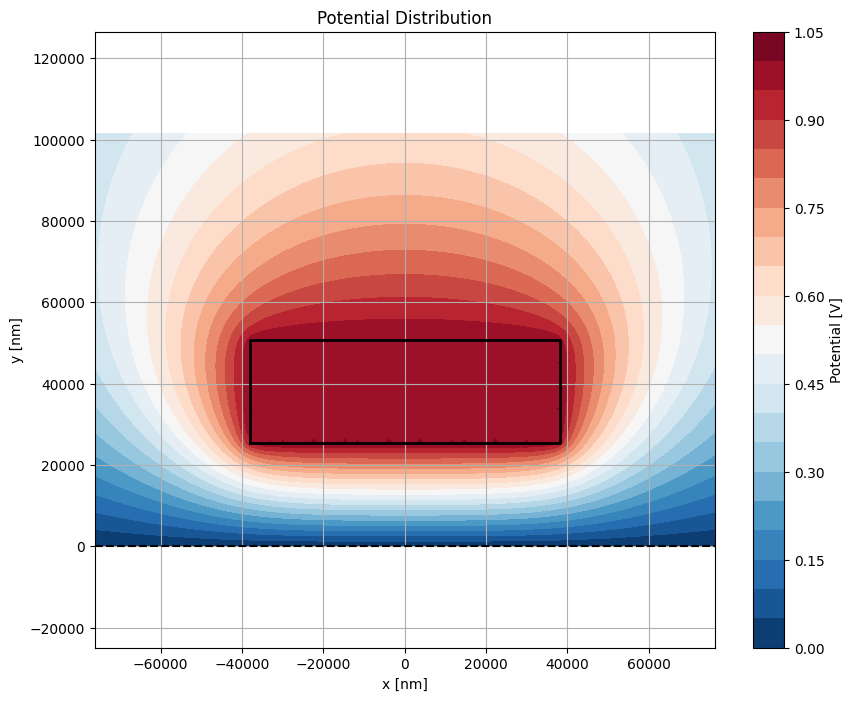

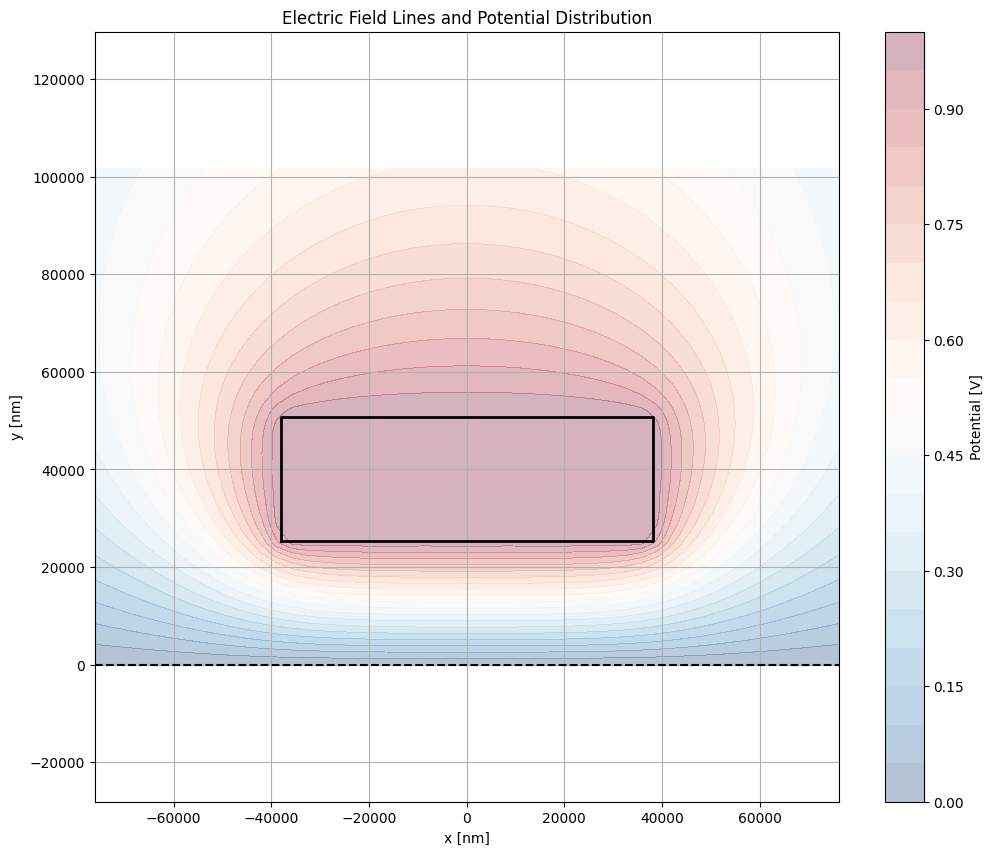


 C Matrix [F/m]:
[[1.09684335e-10]]

 L Matrix [H/m]:
[[1.01438957e-07]]

 Z Matrix [H/m]:
[[30.41095676]]
Capacitance matrix has been saved to ./out/test_pcb_ms1.csv
Conductor 1 charge density range: -1.2947721684286979e-12 -1.06619318675265e-15
Conductor 1 total charge: -4.694996179316271e-18
Conductor 2 charge density range: 4.866856612514524e-13 3.480836748068999e-12
Conductor 2 total charge: 3.062877460706499e-17


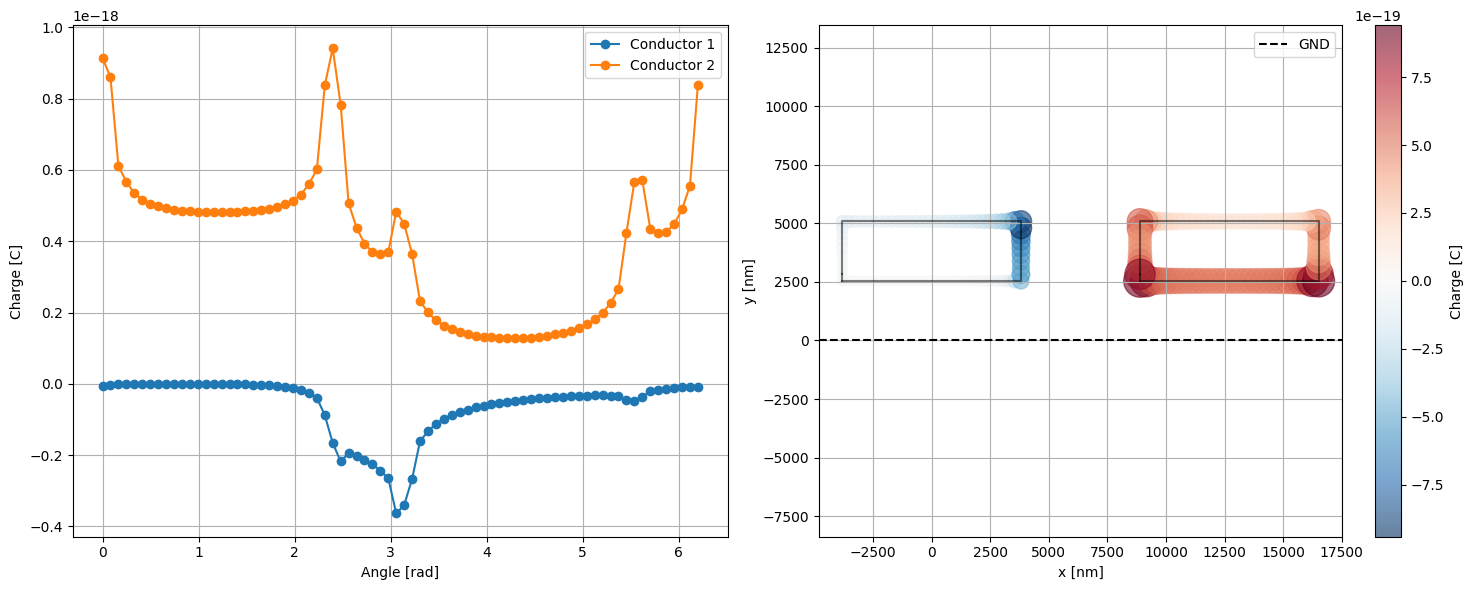

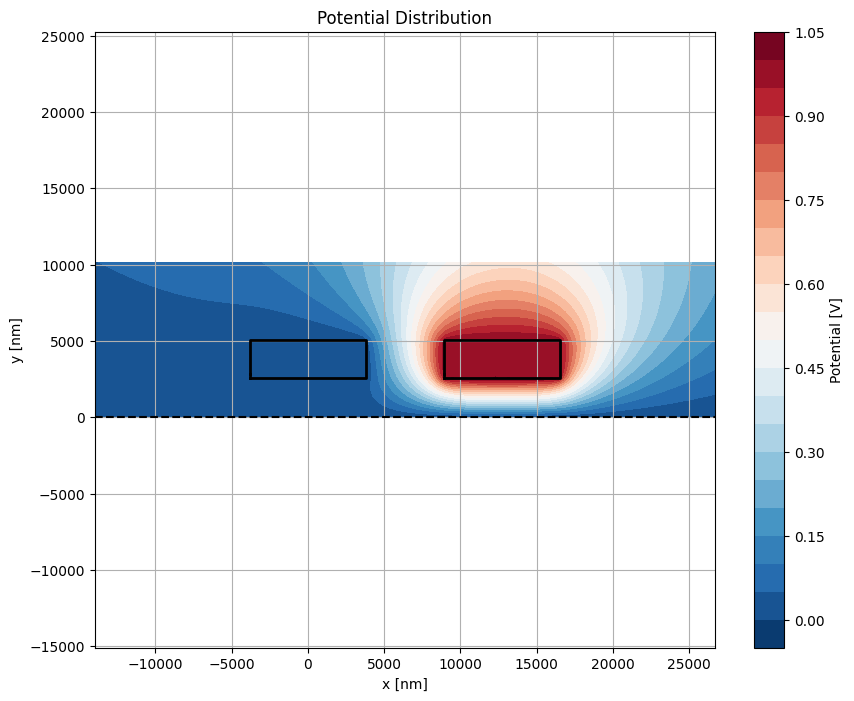

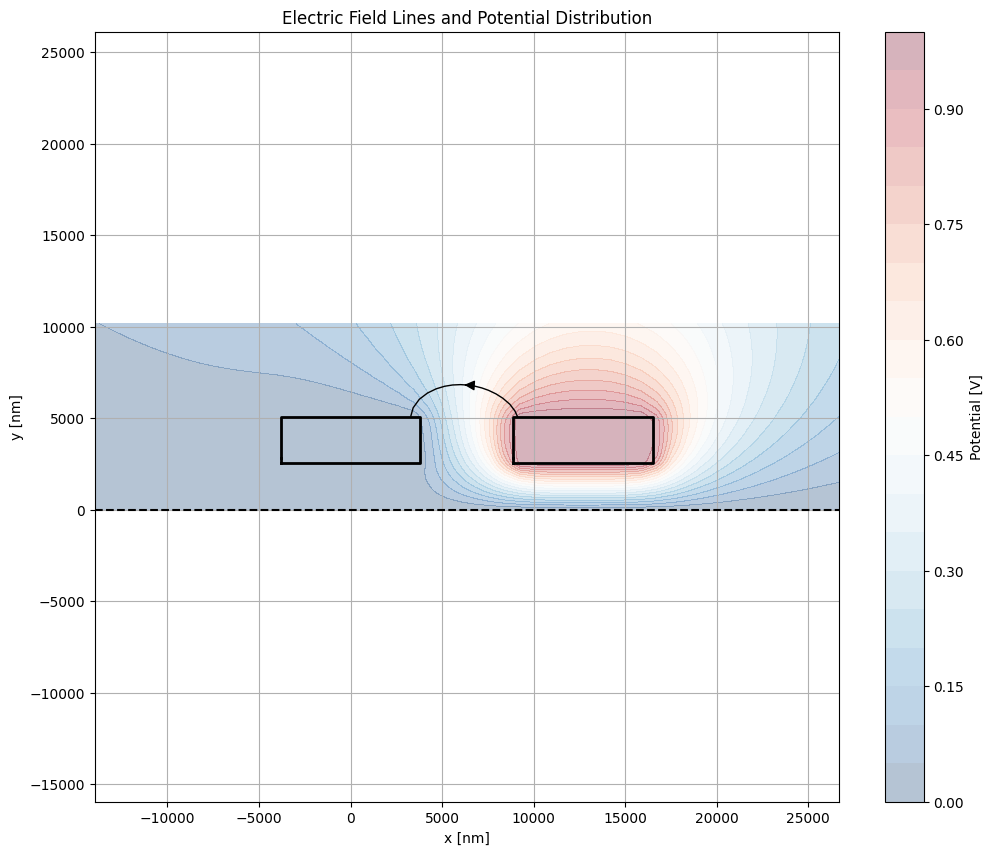


 C Matrix [F/m]:
[[ 1.14098414e-10 -1.72734739e-11]
 [-1.72734739e-11  1.14098414e-10]]

 L Matrix [H/m]:
[[9.98020150e-08 1.51091276e-08]
 [1.51091276e-08 9.98020150e-08]]

 Z Matrix [H/m]:
[[30.26114052 16.46378389]
 [16.46378389 30.26114052]]
Capacitance matrix has been saved to ./out/test_pcb_ms2.csv
Conductor 1 charge density range: 1.341282369309893e-12 2.8833890216379326e-12
Conductor 1 total charge: 2.5891644291997655e-16


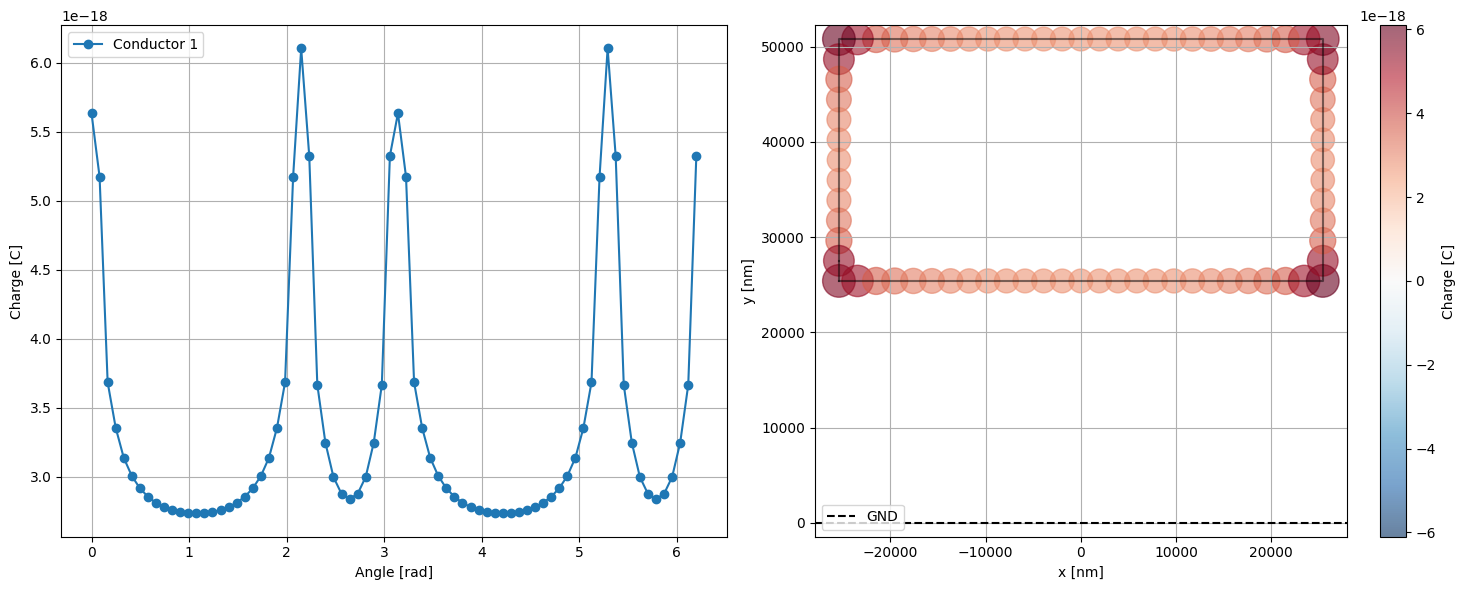

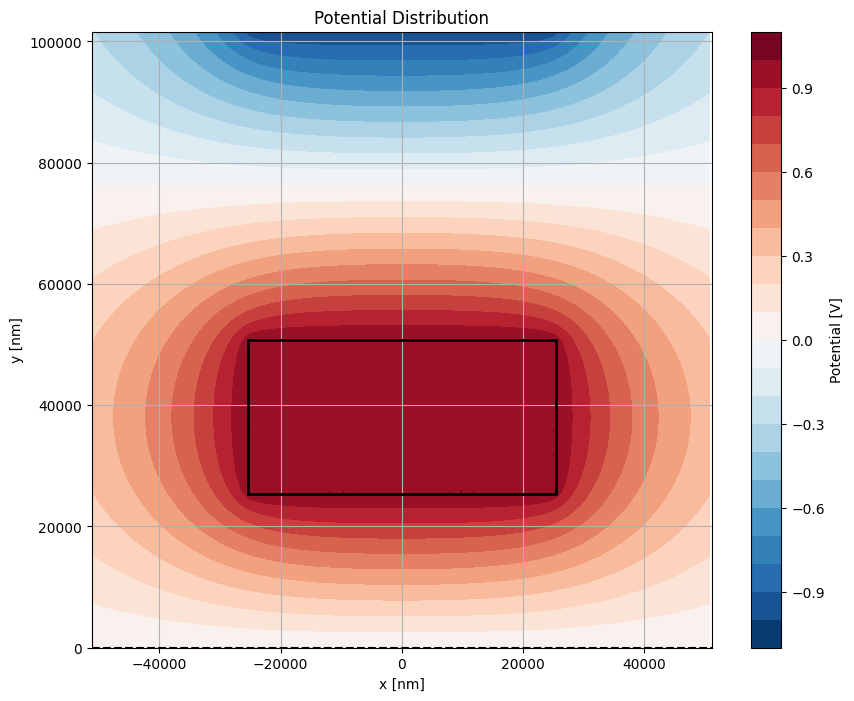

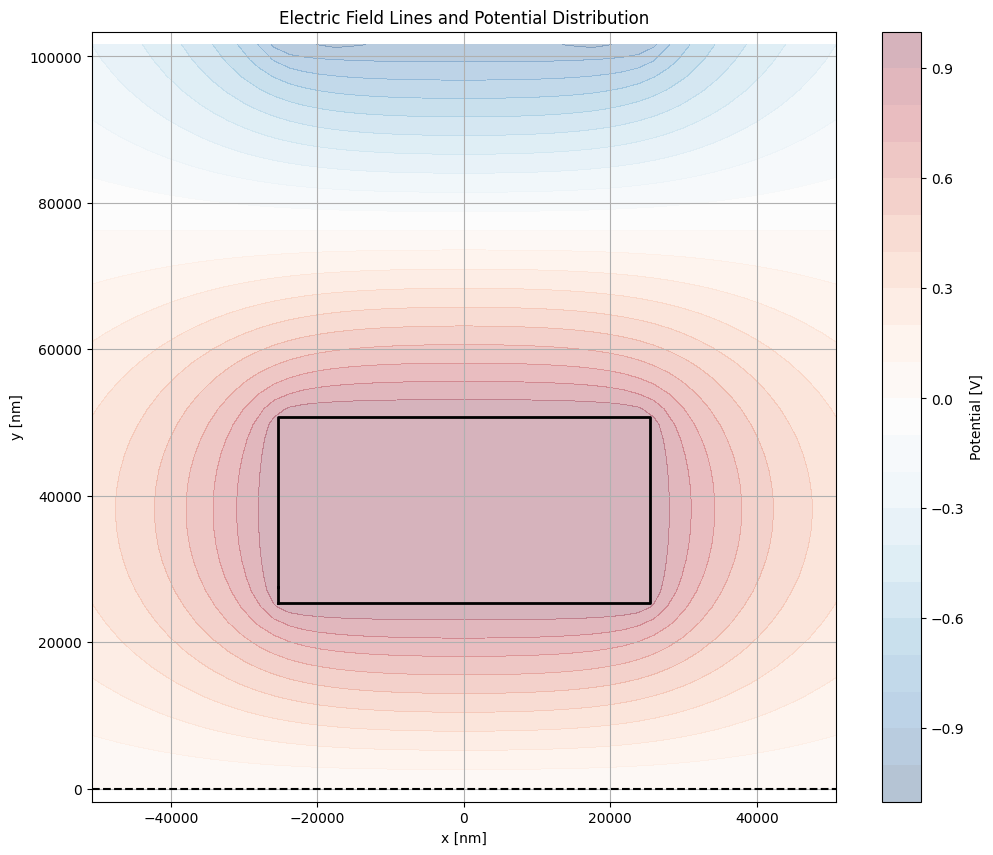


 C Matrix [F/m]:
[[1.28959643e-10]]

 L Matrix [H/m]:
[[8.62771042e-08]]

 Z Matrix [H/m]:
[[25.86549947]]
Capacitance matrix has been saved to ./out/test_pcb_sp1.csv
Conductor 1 charge density range: 1.8100228156014131e-12 3.5497071176104953e-12
Conductor 1 total charge: 4.4028418443183414e-16
Conductor 2 charge density range: -6.001804517310521e-13 -6.515171778824684e-18
Conductor 2 total charge: -1.851251586556145e-17


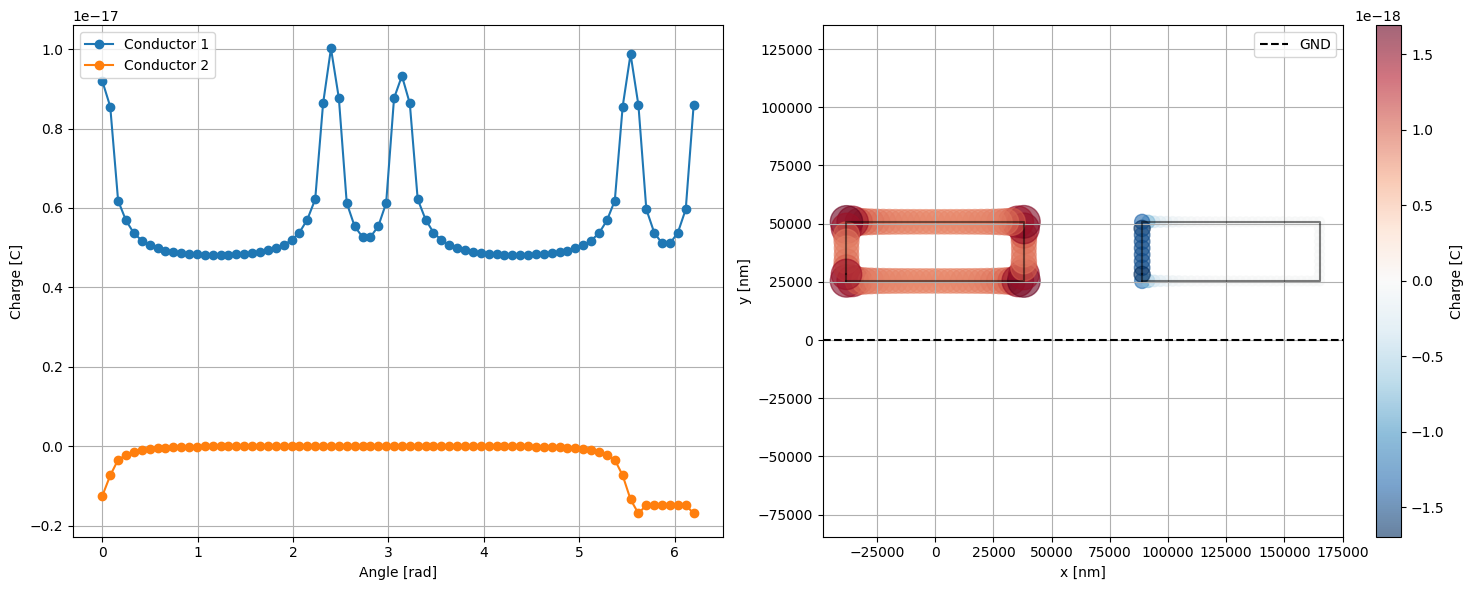

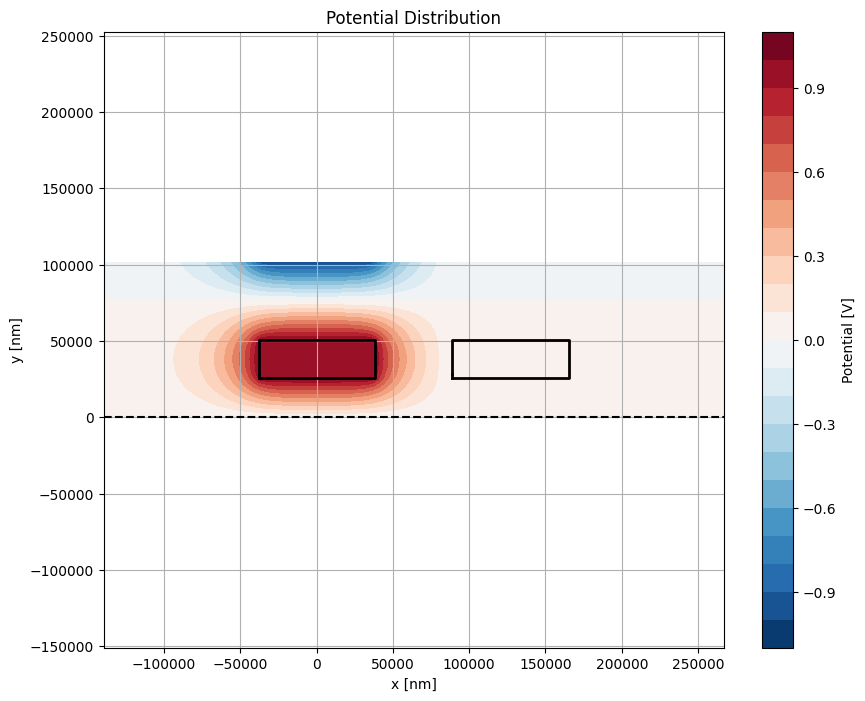

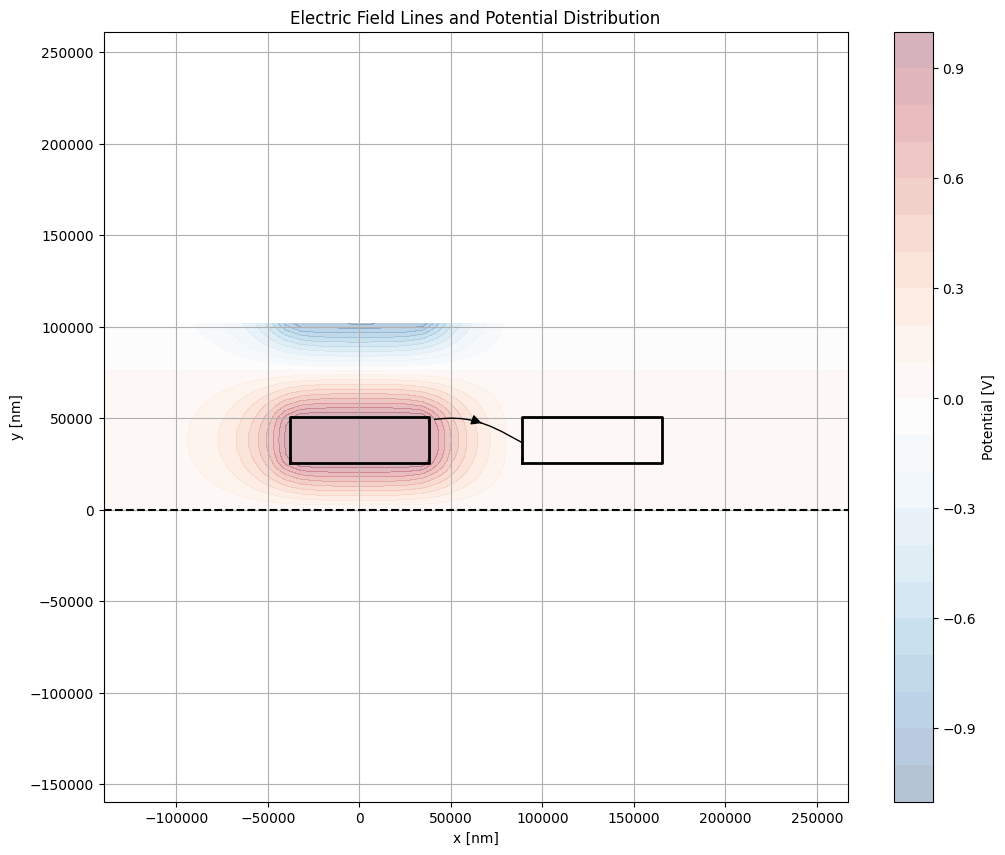


 C Matrix [F/m]:
[[ 1.64376850e-10 -6.68704857e-12]
 [-6.68704857e-12  1.64376850e-10]]

 L Matrix [H/m]:
[[6.77997456e-08 2.75817545e-09]
 [2.75817545e-09 6.77997456e-08]]

 Z Matrix [H/m]:
[[20.34288043  5.79782741]
 [ 5.79782741 20.34288043]]
Capacitance matrix has been saved to ./out/test_pcb_sp2.csv


In [5]:
import sys
import os
# multiconcalc.pyが存在するディレクトリをパスに追加
sys.path.append(os.path.abspath('..'))

import importlib

# クラスを更新した場合更新を反映させるため再読み込み
import multi_conductor_calculator
importlib.reload(multi_conductor_calculator)
from multi_conductor_calculator import MultiConductorCalculator

import multi_conductor_exporter
importlib.reload(multi_conductor_exporter)
from multi_conductor_exporter import MultiConductorExporter

import multi_conductor_visualizer
importlib.reload(multi_conductor_visualizer)
from multi_conductor_visualizer import MultiConductorVisualizer

# PCB Microstrip Line 1導体のテスト
def test_pcb_ms1():
    calculator = MultiConductorCalculator(epsilon_r=2.0)
    
    w = 7.62e-5  # 30mil
    h = 2.54e-5  # 10mil
    n = 80
    bh1 = 2.54e-5  # 10mil
    xo1 = 0

    # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )

    # 電圧設定
    voltages = [1.0]

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)

    # 容量行列
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)

    # ピコファラッド単位で出力
    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_ms1.csv", unit_prefix='p' , length=0.0254 )
 
# PCB Microstrip Line 2導体のテスト
def test_pcb_ms2():
    calculator = MultiConductorCalculator(epsilon_r=2.0)
    
    w = 7.62e-6  # 2mil
    h = 2.54e-6  # 1mil
    n = 80
    bh1 = 2.54e-6  # 1mil
    xo1 = 0
    xo2 = 12.7e-6  # 5mil
    
        # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )

    # Modified voltages array to match the number of conductors
    voltages = [0.0 ,1.0]
    

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)
       
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)


    # ピコファラッド単位で出力
    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_ms2.csv", unit_prefix='p' , length=0.0254 )


# StripLineのテスト 1導体
def test_pcb_sp1():
    calculator = MultiConductorCalculator(epsilon_r=2.0 , height_top= 7.62e-5 )
    
    w = 5.08e-5  # 20mil
    h = 2.54e-5  # 10mil
    n = 80
    bh1 = 2.54e-5  # 10mil
    xo1 = 0
    
        # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )

    # Modified voltages array to match the number of conductors
    voltages = [1.0]
    

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)
       
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)

    # pf/inchで出力
    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_sp1.csv", unit_prefix='p' , length=0.0254 )


# PCBのテスト 2導体
def test_pcb_sp2():
    calculator = MultiConductorCalculator(epsilon_r=2.0 , height_top= 7.62e-5 )
    
    w = 7.62e-5  # 30mil
    h = 2.54e-5  # 10mil
    n = 80
    bh1 = 2.54e-5  # 10mil
    xo1 = 0
    xo2 = 12.7e-5  # 50mil
    
        # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )

    # Modified voltages array to match the number of conductors
    voltages = [1.0, 0.0]
    

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)
       
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)

    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_sp2.csv", unit_prefix='p', length=0.0254)


if __name__ == "__main__":
  test_pcb_ms1()
  test_pcb_ms2()
  test_pcb_sp1()
  test_pcb_sp2()
